<a id='top'> </a>
<h1> <center><font color='Navy'>Prediciting Mortality from Heart Failure:<br> A Comparison of Binary Classification and Survival Analysis</font> </center> </h1>
<center><h3><b>Author:</b> Anil Kumar</h3></center>

<font color='Navy'><b><h3>Table of Contents:</h3></b></font>
<ol>
    <li> <a href='#problem'> <b><h4>Project Motivation</h4></b> </a></li>
    <li> <a href='#dataset'> <b><h4>Dataset</h4></b></a></li>
    <li> <a href='#analysis'> <b><h4>Analysis Plan</h4></b> </a></li>
    <li> <a href='#eda'> <b><h4>Preprocessing and Exploratory Data Analysis</h4></b></a></li>
    <li> <a href='#modeling'> <b><h4>Modeling and Results</h4></b></a></li>
    <li> <a href='#conclusions'> <b><h4>Conclusions</h4></b></a></li>
</ol>

## <a id='problem'>1. Project Motivation </a>

The purpose of this project is to compare classification models and survival analysis in predicting death due to cardiovascular disease (CVD) for patients with risk factors such as hypertension, diabetes, high cholesterol, tobacco use, and other serum markers in the blood.  Please see the <a href='#dataset'> Dataset </a> section for a full list of the predictors.  It is assumed that the reader of this project has a working knowledge of machine learning and survival analysis.  Please feel free to <a href='mailto:anilkumar9782@gmail.com'> email me</a> if there are any questions!

## <a id='dataset'> 2. Dataset </a>

The dataset was obtained from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data.  
It contains records from is 299 patients and 12 features that can be used to predict mortality by CVD.  A summary of the target and features is below.  

<br>

**TARGET (0=No death event, 1=Death event):**
<ul> 
<li><b>DEATH_EVENT</b>: Whether the patient died</li> 
</ul>

<br>

**BINARY FEATURES (0=No, 1=Yes):**
<ul>
<li><b>anaemia</b>: Whether the patient has anaemia (decrease of red blood cells or hemoglobin)</li> 
<li><b>diabetes</b>: Whether the patient has diabetes</li>
<li><b>high_blood_pressure</b>: Whether the patient has high blood pressure</li>
<li><b>smoking</b>: Whether the patient is a smoker</li>
</ul>

<br>

**CATEGORICAL FEATURES:** 
<ul>
<li><b>sex</b>: Sex of person (0=Female, 1=Male) </li> 
</ul>
<br>

**NUMERIC FEATURES:**
<ul>
<li><b>age</b>: Age of patient</li> 
<li><b>creatinine_phosphokinase</b>: Level of the CPK enzyme in the blood (mcg/L)</li> 
<li><b>ejection_fraction</b>: Percentage of blood leaving the heart at each contraction (percentage)</li> 
<li><b>platelets</b>: Platelets in the blood (kiloplatelets/mL)</li> 
<li><b>serum_creatinine</b>: Level of serum creatinine in the blood (mg/dL)</li> 
<li><b>serum_sodium</b>: Level of serum sodium in the blood (mEq/L)</li> 
<li><b>time</b>: Follow-up period (days)</li> 
 
</ul>

<br>

## <a id='analysis'> 3. Analysis Plan </a>

The problem will be approached in 2 ways:
<ul>
<li>Supervised learning binary classification</li>
<li>Survival analysis </li>
</ul>

For supervised learning, models appropriate for binary classification are implemented.  Specifically, three types of techniques are compared: <ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>Extreme Gradient Boosting</li>
</ul>

Logistic Regression model is a good baseline for a binary classification problem as its complexity and computational time is minimal compared to ensemble tree-based methods or other more complex models.  For the Random Forest and Extreme Gradient Boosting models,  hyperparameter tuning through randomized grid searches is utilized.  This is an imbalanced classification problem since there are approximately two times as many non-deaths than deaths in the dataset.  Due to this fact, **Area under the ROC curve (AUC)** and **Log Loss** will be used as the evaluation metrics.  Additionally, a confusion matrix will be utilized to calculate **accuracy, precision, recall, specificity,** and **F1 score**, for each of the models.

A reason **survival analysis** may be more appropriate for this problem is because the data is **censored**, more specifically it is **right-censored**.  Each observation in the dataset contains information about whether patients died before the follow-up period indicated by the **time** column in the dataset. Thus, "**DEATH_EVENT**=0" does not mean that the patient did not eventually die, only that the patient had not died by the time of the follow-up.  

Consider the image below.  Patient A died by the follow-up up period, so this is a clear death event.  However, Patient B did not die during the length of the trial.  It is known the that Patient B will eventually die, but it's unknown when this will occur.  Patient C survived up until the some follow-up time, but dropped out of the study after this point.  This patient could have died by the end of the study, but this information is unknown.    

<img src="https://tinyheero.github.io/assets/survival-analysis/censoring/right-censoring.jpg" alt="image info" />

**Survival analysis** takes into account this issue of censoring, and gives a better picture of probabilities of survival after certain follow-up periods.  For survival analysis, **Kaplan-Meier** curves and a **Cox proportional hazards** model are utilized.  

## <a id='eda'> 4. Preprocessing and Exploratory Data Analysis </a>

In [631]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='pastel')
import warnings
warnings.filterwarnings('ignore')

In [681]:
#read in the data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#Allow output cells to display unlimited columns/rows as needed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [679]:
#dimensions of dataset and print first 10 rows
print(df.shape)
df.head(10)

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [633]:
#basic check for missing values and summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [683]:
#Further examine summary stats of column values to explore data and check for possible invalid entries
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [684]:
#print value counts for every column to further check for invalid entries
for c in df.columns:
    print(df[c].value_counts(dropna=False).sort_index(), "\n")

40.000     7
41.000     1
42.000     7
43.000     1
44.000     2
45.000    19
46.000     3
47.000     1
48.000     2
49.000     4
50.000    27
51.000     4
52.000     5
53.000    10
54.000     2
55.000    17
56.000     1
57.000     2
58.000    10
59.000     4
60.000    33
60.667     2
61.000     4
62.000     5
63.000     8
64.000     3
65.000    26
66.000     2
67.000     2
68.000     5
69.000     3
70.000    25
72.000     7
73.000     4
75.000    11
77.000     2
78.000     2
79.000     1
80.000     7
81.000     1
82.000     3
85.000     6
86.000     1
87.000     1
90.000     3
94.000     1
95.000     2
Name: age, dtype: int64 

0    170
1    129
Name: anaemia, dtype: int64 

23       1
30       1
47       3
52       1
53       1
54       1
55       1
56       2
57       1
58       1
59       3
60       3
61       2
62       1
63       1
64       3
66       4
68       3
69       3
70       1
72       1
75       1
76       1
78       1
80       2
81       2
84       3
86       1
88     

Looks like there are no missing or invalid entries in the dataset.  Now, the dataset is visually explored.  

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64 

 0    203
1     96
Name: DEATH_EVENT, dtype: int64


Text(0.5, 1.0, 'Total number of death events and non-death events')

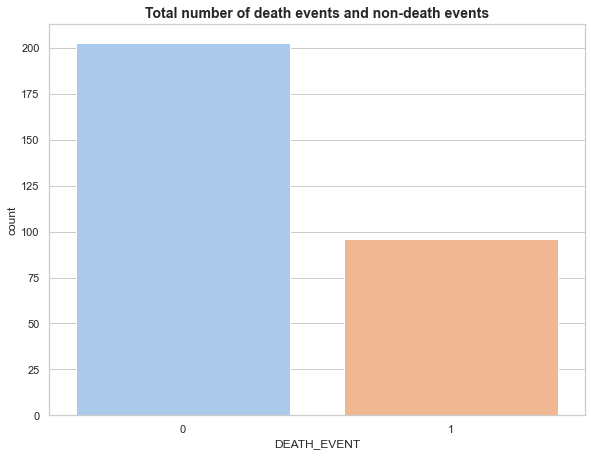

In [637]:
#Print count and proportion of deaths in dataset
print(df.DEATH_EVENT.value_counts(normalize=True), "\n\n", df.DEATH_EVENT.value_counts())

# Create a countplot of target (DEATH_EVENT)
plt.figure(figsize=[9.6,7.2])
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Total number of death events and non-death events', fontsize=14, fontweight='bold')

From the tables and plot, it is seen that 203 (67.9%) of the 299 observations are censored (i.e. patients have not experienced death by their observed follow-up time.

The continuous (numeric) features of the dataset are explored to visualize the varying distributions of these features between the patients that survived and died.  Kernel density estimate (KDE) plots and box plots are utilized.    

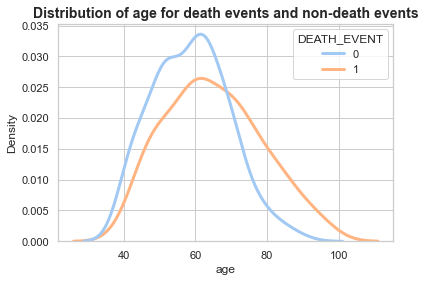

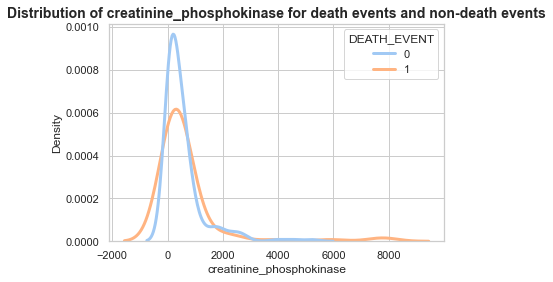

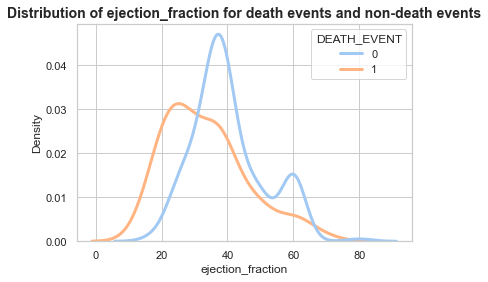

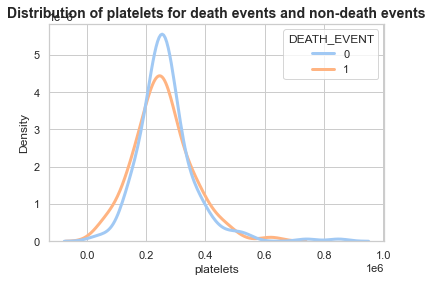

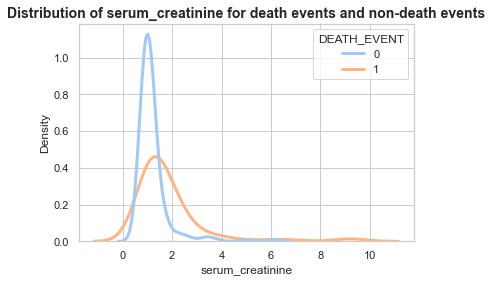

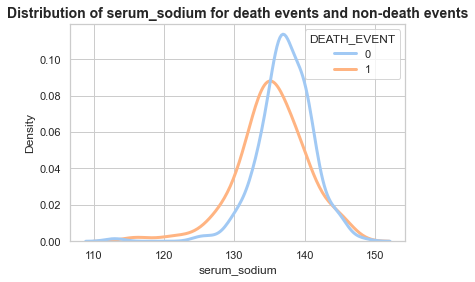

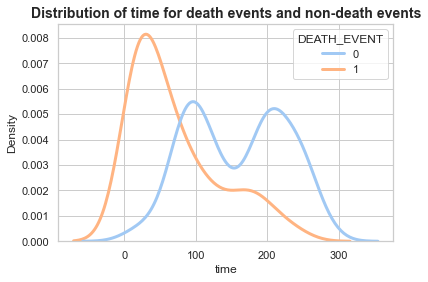

In [638]:
#list of categorical/binary columns
binary_cols = ['anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking'
              ]

#only select numeric feature columns in df_viz
df_viz = df.drop(binary_cols, axis=1)
columns= df_viz.columns 

#plot kde for each numeric feature, separating the patients that survived and died
# 'common_norm=False' --> If True, scale each conditional density by the number of observations 
#                         such that the total area under all densities sums to 1. Otherwise, 
#                         normalize each density independently.
for c in columns:
    if c!='DEATH_EVENT':
        plt.figure()
        sns.kdeplot(data=df_viz, x=c, hue='DEATH_EVENT', linewidth=3, common_norm=False)
        title = 'Distribution of ' + c + ' for death events and non-death events'
        plt.title(title, fontsize=14, fontweight='bold')

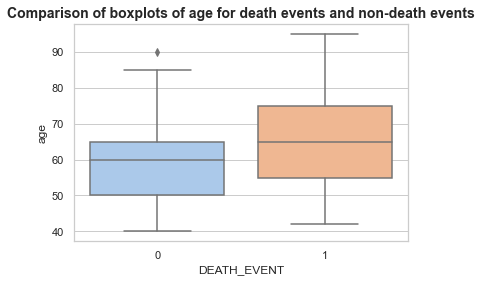

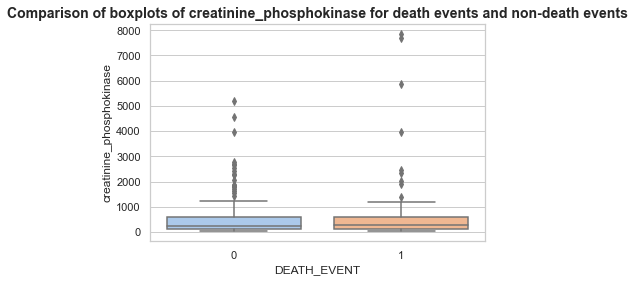

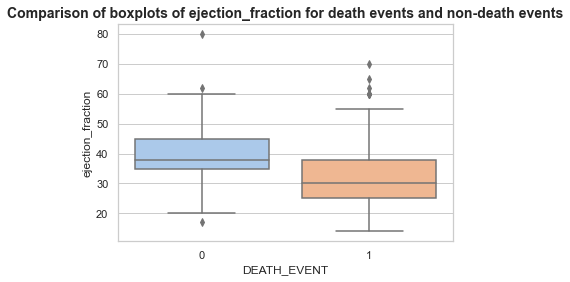

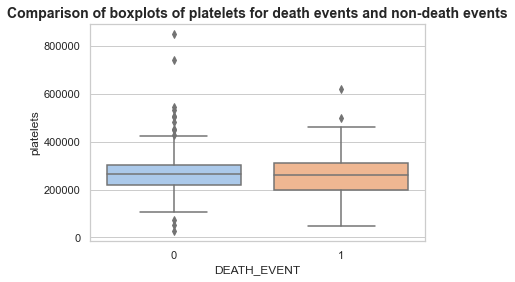

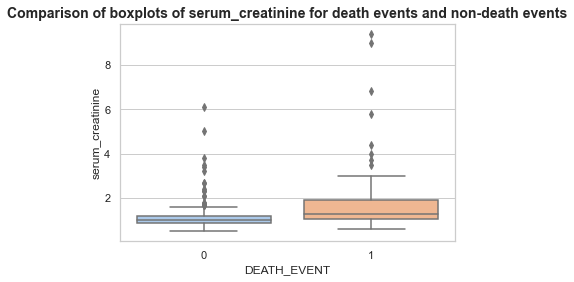

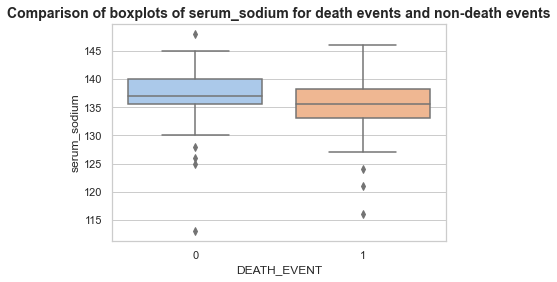

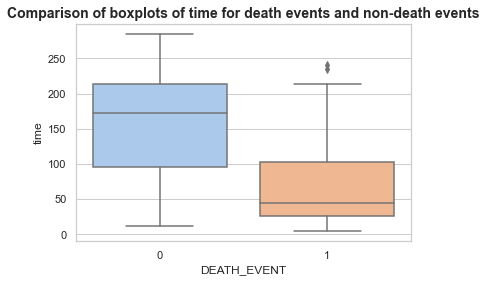

In [639]:
for c in columns:
    if c!='DEATH_EVENT':
        plt.figure()
        sns.boxplot(x='DEATH_EVENT', y=c, data=df)
        title = 'Comparison of boxplots of ' + c + ' for death events and non-death events'
        plt.title(title, fontsize=14, fontweight='bold')

Looks like the following features show the most drastic differences the distributions between patients that survived and died: 
<ul>
    <li><b>age</b></li>
    <li><b>ejection fraction</b></li>
    <li><b>serum creatinine</b></li>
    <li><b>time</b></li>
</ul>

Now, the binary features are further explored to visualize the distributions of these features between the patients that survived and died.  Normalized count plots and cross tables are utilized.   

<Figure size 432x288 with 0 Axes>

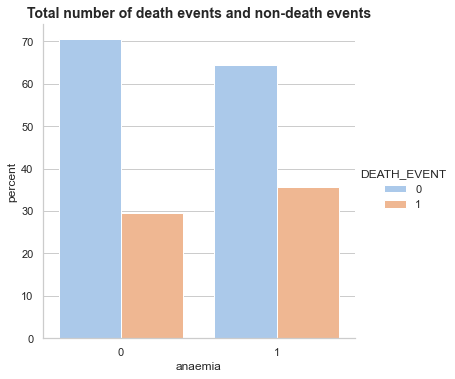

<Figure size 432x288 with 0 Axes>

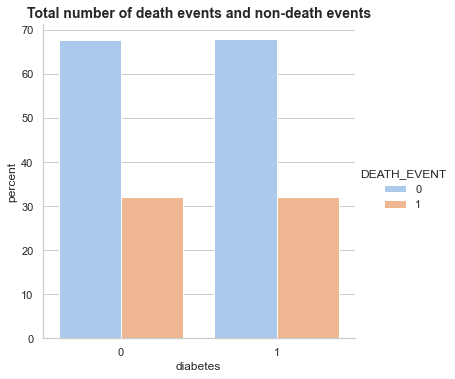

<Figure size 432x288 with 0 Axes>

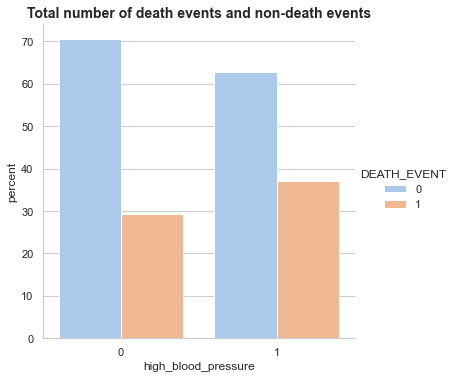

<Figure size 432x288 with 0 Axes>

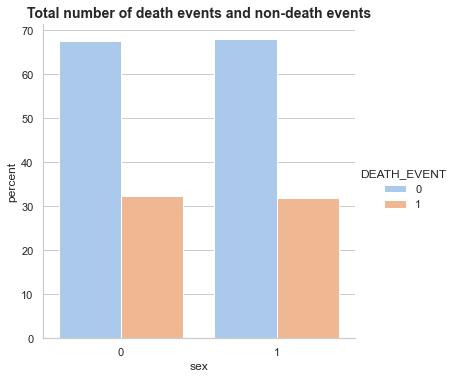

<Figure size 432x288 with 0 Axes>

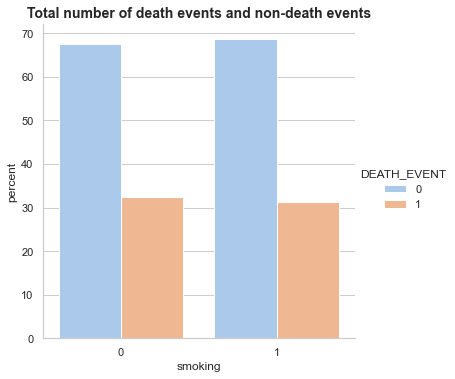

In [640]:
for b in binary_cols:
    plt.figure()
    
    x,y = b, 'DEATH_EVENT'

    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
    
    plt.title('Total number of death events and non-death events', fontsize=14, fontweight='bold')

In [641]:
print("--------------------------\n")

#For each feature, print two 2x2 contingency tables: one with counts and one with proportions across columns
for b in binary_cols:
    data_crosstab = pd.crosstab(df[b], df['DEATH_EVENT'], margins = False)
    print(data_crosstab,"\n")
    data_crosstab = pd.crosstab(df[b], df['DEATH_EVENT'], margins = False, normalize='index')
    print(data_crosstab, "\n")
    print("--------------------------\n")

--------------------------

DEATH_EVENT    0   1
anaemia             
0            120  50
1             83  46 

DEATH_EVENT         0         1
anaemia                        
0            0.705882  0.294118
1            0.643411  0.356589 

--------------------------

DEATH_EVENT    0   1
diabetes            
0            118  56
1             85  40 

DEATH_EVENT         0         1
diabetes                       
0            0.678161  0.321839
1            0.680000  0.320000 

--------------------------

DEATH_EVENT            0   1
high_blood_pressure         
0                    137  57
1                     66  39 

DEATH_EVENT                 0         1
high_blood_pressure                    
0                    0.706186  0.293814
1                    0.628571  0.371429 

--------------------------

DEATH_EVENT    0   1
sex                 
0             71  34
1            132  62 

DEATH_EVENT         0         1
sex                            
0            0.676190  0.3

Patients with **anaemia** and **high blood pressure** visually larger number of death events than those without those conditions.  **Diabetes, gender**, and **smoking status** did not have drastic effects on the proportion of deaths.

Now, the data is visually explored from a survival analysis perspective using **Kaplan-Meier** (KM) curves.  First, a baseline curve is created.  

Text(0, 0.5, 'Survival Probability')

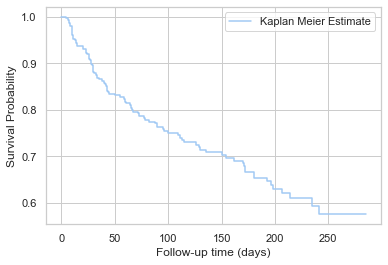

In [642]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test

km = KaplanMeierFitter() 

km.fit(df['time'], df['DEATH_EVENT'],label='Kaplan Meier Estimate')

## Create an estimate
km.plot_survival_function(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

plt.xlabel("Follow-up time (days)")
plt.ylabel("Survival Probability")

Now, multiple KM curves are created, stratifying on each predictor.  If the feature is binary, then the 2 curves on the plots represent those with and without exposure.  For the continuous predictors, the curves on the graph represent patients with values above the median value or below or equal to the median value for that predictor.  Confidence intervals are shown on all of the plots.    

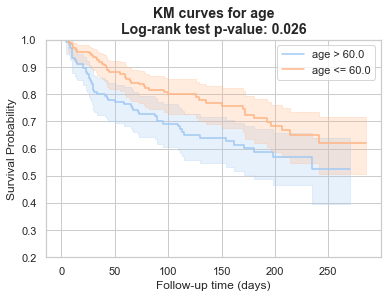

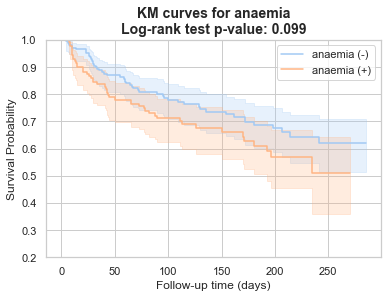

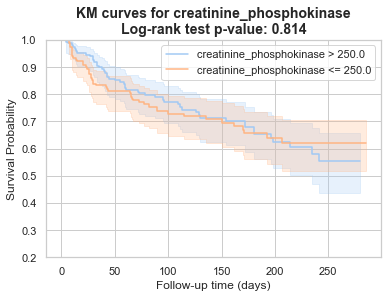

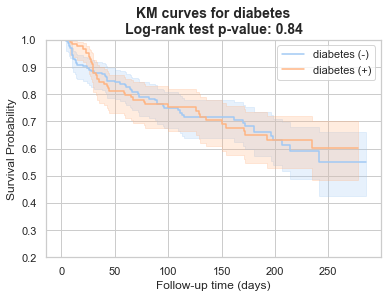

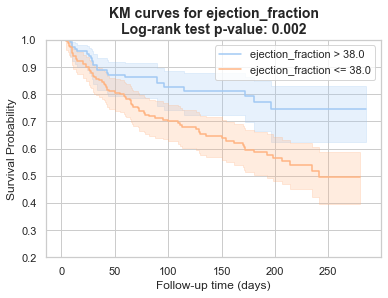

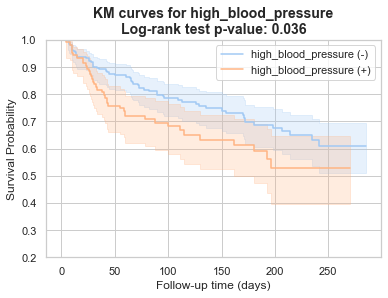

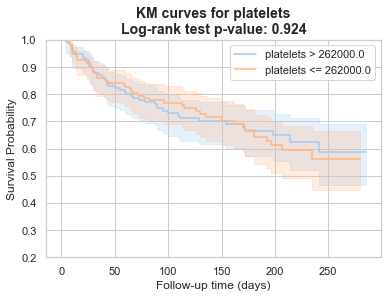

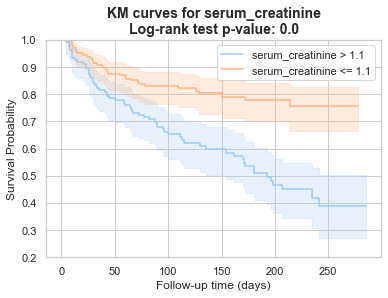

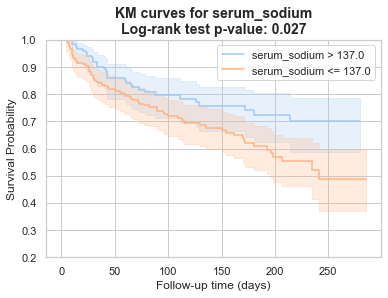

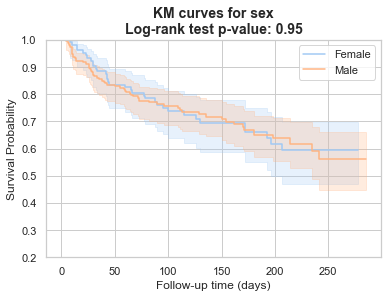

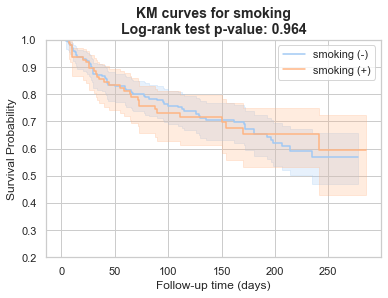

In [714]:
T = df.time
E = df.DEATH_EVENT

df_viz = df.drop(columns=['DEATH_EVENT','time'], axis=1)
columns = df_viz.columns

binary_cols = ['anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking'
              ]

## Instantiate the class to create an object
km_2 = KaplanMeierFitter()

for c in columns:
    plt.figure()
    groups = df[c] 
    
    if c in binary_cols:
        i1 = (groups == 0)   
        i2 = (groups == 1)    

        if c=='sex':
            label1 = "Female" 
            label2 = "Male"
        
        else:
            label1 = c + " (-)" 
            label2 = c + " (+)" 

        ## fit the model for 1st cohort
        km_2.fit(T[i1], E[i1], label=label1)
        a1 = km_2.plot(ci_show=True)

        ## fit the model for 2nd cohort
        km_2.fit(T[i2], E[i2], label=label2)
        km_2.plot(ax=a1, ci_show=True)

        plt.xlabel("Time (days)")
        plt.ylabel("Survival Probability")
    
    else:  
        i1 = (groups > np.median(df[c]))   
        i2 = (groups <= np.median(df[c]))    

        label1 = c + " > " + str(np.median(df[c]))
        label2 = c + " <= " + str(np.median(df[c]))

        ## fit the model for 1st cohort
        km_2.fit(T[i1], E[i1], label=label1)
        a1 = km_2.plot(ci_show=True)

        ## fit the model for 2nd cohort
        km_2.fit(T[i2], E[i2], label=label2)
        km_2.plot(ax=a1, ci_show=True)

    plt.xlabel("Follow-up time (days)")
    plt.ylabel("Survival Probability")
    plt.ylim([0.2, 1])
    #plt.legend(loc="center right", bbox_to_anchor=(0.5, 1.15), ncol=5)

    lrt = logrank_test(T[i1],T[i2],E[i1],E[i2])
    plt.title("KM curves for "+c+"\nLog-rank test p-value: {}".format(round(lrt.p_value, 3)),fontsize=14, fontweight='bold')
    

From the KM, curves, it is seen that the following features have an impact on survival based on visualization and p-value < 0.05 for log-rank test:
<ul>
    <li><b>age</b></li>
    <li><b>ejection fraction</b></li>
    <li><b>high blood pressure</b></li>
    <li><b>serum creatinine</b></li>
    <li><b>serum sodium</b></li>
</ul>


The **log-rank** test essentially determines if the KM survival curves and probabilities are statistically different.  Of note,  data must be right-censored for this test to be valid.

Though the KM curves and log-ranks tests are great tools to visualize the survival curves and test for significance based on univariate analysis, they do not account the combined effects of all of the predictors.  Therefore, more formal hypothesis testing or regression-based methods are needed to make a conclusion.  A **Cox proportional hazards** model is utilized the section below to address this issue.  

## <a id='modeling'> 5. Modeling and Results </a>


First, modeling will be completed utilizing methods for a supervised learning binary classification problem.  Afterwards, survival analysis is completed using a Cox proportional hazards model.  

In [644]:
#!pip install lifelines
#!pip install sksurv

In [645]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, plot_roc_curve, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

In [646]:
#Function obtained from DTrimarchi10 on GitHub
#https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            specificity = cf[0,0] / sum(cf[0,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\n\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nSpecificity={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,specificity, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual value')
        plt.xlabel('Predicted value' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

#Fuction to generate feature importances of tree-based models
def get_feature_importance(model, feature_columns):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    f_imp = {} 
    f_imp['f_feature'] = []
    f_imp['f_value'] = []

    for f in range(X.shape[1]):
        f_imp['f_feature'].append(feature_columns[indices[f]])
        f_imp['f_value'].append(importances[indices[f]])

    imp_df = pd.DataFrame(f_imp)
    return imp_df

Prior to modeling, the dataset is split into training and validation sets at a ratio of 80/20 and stratified on **DEATH_EVENT** to ensure an equal proportion of death events in both sets.  The **time** feature retained as one of the predictors.  However, as shown in the EDA, this predictor might potentially cause target leakage.  That is, if the follow-up period is longer, the patients tend to not die (i.e. DEATH_EVENT=0).  This could potentially bias the model's predictions.   

In [647]:
#Separate the features and target
X = df.drop(columns=['DEATH_EVENT'], axis=1) #Features for label encoded dataframe
y = df.DEATH_EVENT #Target

#Split the data into training and validation sets and stratify on target to make sure equal proportion of targets
#in the training and validation sets, for both the label encoded and one-hot encoded datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

### 5.1 Logistic Regression

In [648]:
#Logistic Regression Classifer that is fit to one-hot encoded training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [649]:
######## Predicted probabilities and classes using training set ########
pred_probs = lr_clf.predict_proba(X_train)
y_pred = lr_clf.predict(X_train)

#Log Loss, AUC, and mean AUC/Log-Loss of 5-fold cross validation
lr_train_logloss = log_loss(y_train, pred_probs[:,1])
lr_train_auc = roc_auc_score(y_train, pred_probs[:,1]) 
lr_train_cv_auc = cross_val_score(lr_clf, X_train, y_train, scoring='roc_auc', cv=5)
lr_train_cv_logloss = cross_val_score(lr_clf, X_train, y_train, scoring='neg_log_loss', cv=5)

#Print metrics
print("\nTRAINING SET:")
print("Logistic Regression Log Loss: ", lr_train_logloss )
print("Logistic Regression AUC: ", lr_train_auc)
print("Logistic Regression 5-Fold CV Mean Log Loss: ", abs(lr_train_cv_logloss.mean()))
print("Logistic Regression 5-Fold CV Mean AUC: ", lr_train_cv_auc.mean())


######## Predicted probabilities and classes using validation set ########
pred_probs = lr_clf.predict_proba(X_val)
y_pred = lr_clf.predict(X_val)

#Log Loss, AUC in validation set
lr_val_logloss = log_loss(y_val, pred_probs[:,1])
lr_val_auc = roc_auc_score(y_val, pred_probs[:,1]) 

#Print metrics
print("\nVALIDATION SET:")
print("Logistic Regression Log Loss: ", lr_val_logloss )
print("Logistic Regression AUC: ", lr_val_auc)



TRAINING SET:
Logistic Regression Log Loss:  0.4022839559674613
Logistic Regression AUC:  0.8770242103575436
Logistic Regression 5-Fold CV Mean Log Loss:  0.42808635518697635
Logistic Regression 5-Fold CV Mean AUC:  0.872918244949495

VALIDATION SET:
Logistic Regression Log Loss:  0.44452619186081616
Logistic Regression AUC:  0.8562259306803595


In [650]:
logistic_regression = sm.Logit(y_train,sm.add_constant(X_train))
result = logistic_regression.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.355674
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  239
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           12
Date:                Tue, 31 Aug 2021   Pseudo R-squ.:                  0.4341
Time:                        15:10:27   Log-Likelihood:                -85.006
converged:                       True   LL-Null:                       -150.21
Covariance Type:            nonrobust   LLR p-value:                 5.106e-22
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.4744      6.438      0.850      0.395      -7.143

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression Model (Threshold: 0.05)')

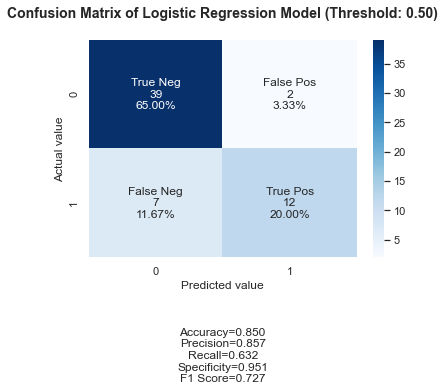

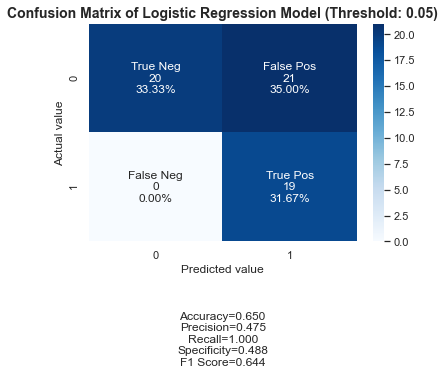

In [687]:
#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression Model (Threshold: 0.50)\n", fontsize=14, fontweight='bold')

#probability threshold
threshold = 0.05

#make new predicitions based on this threshold
y_pred_threshold = (lr_clf.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

Based on the p-values, the most significant predictors for the logistic regression model are **serum creatinine**, **ejection fraction**, and **time**.

Additionally, with a validation set AUC of 0.86 the logistic regression model has relatively good predictive power.  Looking at the first of the above confusion matrices, 11.67% of the predictions for the test set are false negatives.  This is an issue considering the that event the model is trying to predict is death.  For comparison, when the threshold is lowered to 0.05 to compensate, the model no longer predicts false negatives and its recall (sensitivity) is 100%.  For situations such as this where a false negative indicates missing a diagnosis that could could death, lowering the probability threshold to sacrifice accuracy and specificity for recall is probably justified.    

### 5.2 Random Forest

In [652]:
#Set up paramter grid for randomized grid search
params = {
            'max_depth': [2, 3, 4, 5, 6],
            'n_estimators': [50, 100, 250, 500, 1000]
         }

#Create Random Forest classifier 
rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1)

#Create a randomized grid search using rf_clf with 5-fold cross validation for each of the model candidates (niterations)
nfolds = 5
niterations = 15
skf = StratifiedKFold(n_splits=nfolds, shuffle = True, random_state = 1234)
random_search = RandomizedSearchCV(rf_clf, param_distributions=params, n_iter=niterations, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=1234)

#Train the models
random_search.fit(X_train, y_train)

#Find the best model
best_model_rf = random_search.best_estimator_

#Print the best model and hyperparameters 
print('\n Best Model:')
print(best_model_rf)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits

 Best Model:
RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=1234)

 Best hyperparameters:
{'n_estimators': 100, 'max_depth': 2}


In [653]:
######## Predicted probabilities and classes using training set ########
pred_probs = best_model_rf.predict_proba(X_train)
y_pred = best_model_rf.predict(X_train)

#Log Loss, AUC, and mean AUC/Log-Loss of 5-fold cross validation
rf_train_logloss = log_loss(y_train, pred_probs[:,1])
rf_train_auc = roc_auc_score(y_train, pred_probs[:,1]) 
rf_train_cv_auc = cross_val_score(best_model_rf, X_train, y_train, scoring='roc_auc', cv=5)
rf_train_cv_logloss = cross_val_score(best_model_rf, X_train, y_train, scoring='neg_log_loss', cv=5)

#Print metrics
print("\nTRAINING SET:")
print("Random Forest Log Loss: ", rf_train_logloss )
print("Random Forest AUC: ", rf_train_auc)
print("Random Forest 5-Fold CV Mean Log Loss: ", abs(rf_train_cv_logloss.mean()))
print("Random Forest 5-Fold CV Mean AUC: ", rf_train_cv_auc.mean())


######## Predicted probabilities and classes using validation set ########
pred_probs = best_model_rf.predict_proba(X_val)
y_pred = best_model_rf.predict(X_val)

#Log Loss, AUC
rf_val_logloss = log_loss(y_val, pred_probs[:,1])
rf_val_auc = roc_auc_score(y_val, pred_probs[:,1]) 

#Print metrics
print("\nVALIDATION SET:")
print("Random Forest Log Loss: ", rf_val_logloss )
print("Random Forest AUC: ", rf_val_auc)


TRAINING SET:
Random Forest Log Loss:  0.3933329687162609
Random Forest AUC:  0.9535834535834536
Random Forest 5-Fold CV Mean Log Loss:  0.4301005570945587
Random Forest 5-Fold CV Mean AUC:  0.9127241161616162

VALIDATION SET:
Random Forest Log Loss:  0.4489952268686737
Random Forest AUC:  0.9062901155327343


In [654]:
#Print top 10 most important features of the Random Forest model
feature_columns = list(X.loc[:, X.columns != 'match'].columns)
rf_imp = get_feature_importance(best_model_rf, feature_columns)
rf_imp.sort_values('f_value',ascending=False).head(10)

,f_feature,f_value
0,time,0.373807
1,ejection_fraction,0.191465
2,serum_creatinine,0.170375
3,age,0.098734
4,serum_sodium,0.057788
5,platelets,0.050302
6,creatinine_phosphokinase,0.032706
7,high_blood_pressure,0.008014
8,smoking,0.007256
9,diabetes,0.004962


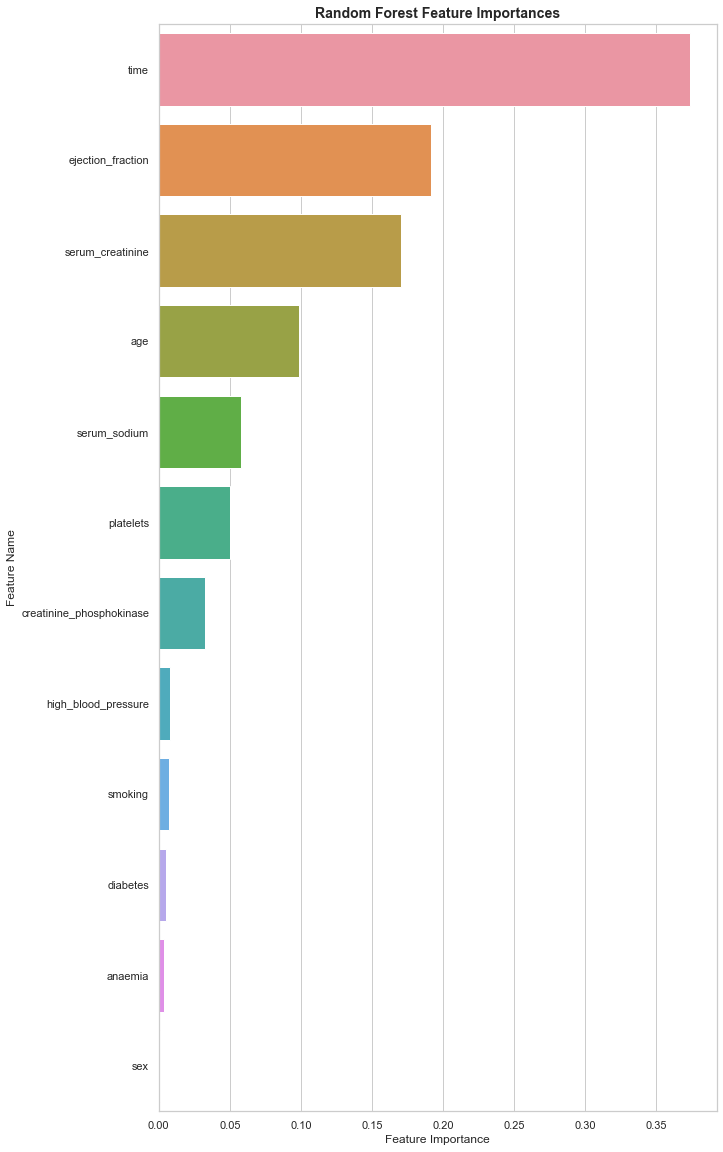

In [655]:
#Plot importances of all features sorted in descending order (most to least)
fig, ax = plt.subplots(figsize=(10,20))

sns.barplot(x=rf_imp.f_value, y=rf_imp.f_feature, ax =ax);
ax.set_xlabel('Feature Importance');
ax.set_ylabel('Feature Name');
ax.set_title('Random Forest Feature Importances', fontsize=14, fontweight='bold');

Text(0.5, 1.0, 'Confusion Matrix of Random Forest Model (Threshold: 0.16)')

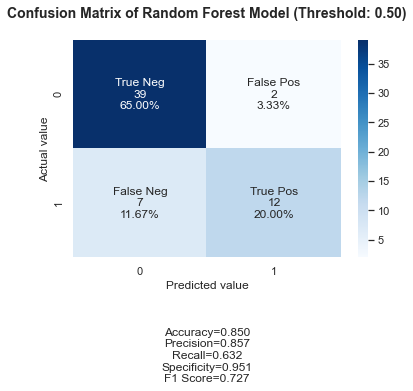

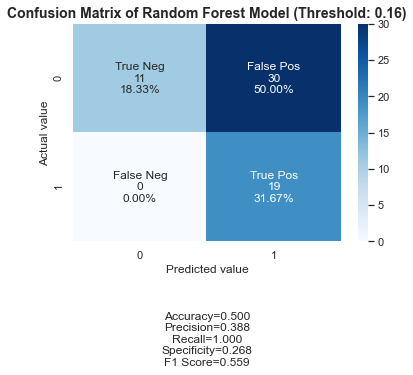

In [699]:
#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of Random Forest Model (Threshold: 0.50)\n", fontsize=14, fontweight='bold')

#probability threshold
threshold = 0.16

#make new predicitions based on this threshold
y_pred_threshold = (best_model_rf.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of Random Forest Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

Like the logistic regression model, the most significant predictors for the random forest model are **serum creatinine**, **ejection fraction**, and **time**.

With a validation set AUC of 0.91 the random forest model beats logistic regression AUC. Looking at the first of the above confusion matrices, the model still predicts 11.67% of patients as false negatives in the test set which is the same as the Logistic Regression model at 0.50 threshold.  As previously stated, this is costly, considering that the event the model is trying to predict is death.  Lowering the threshold to 0.16 compensates for this issue.  However, at this threshold where the recall is 100%, there are more false positives (50%) than for the logistic regression model threshold where recall was 100% (35% false positives). 

### 5.3 Extreme Gradient Boosting

In [657]:
#Set up paramter grid for randomized grid search
params = {
        'lambda': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'n_estimators': [100, 250, 500]
        }

#Create XGBoost classifier 
xgb_clf = XGBClassifier(use_label_encoder=False, random_state=1234, verbosity=0, n_jobs=-1)

#Create a randomized grid search using xgb_clf with 5-fold cross validation for each of the model candidates (niterations)
nfolds = 5
niterations = 30
skf = StratifiedKFold(n_splits=nfolds, shuffle = True, random_state = 1234)
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=niterations, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=1234)

#Train the models
random_search.fit(X_train, y_train)

#Find the best model
best_model_xgb = random_search.best_estimator_

#Print the best model and hyperparameters 
print('\n Best Model:')
print(best_model_xgb)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', lambda=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              random_state=1234, reg_alpha=0, reg_lambda=0.5,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.01, 'lambda': 0.5, 'colsample_bytree': 0.6}


In [658]:
######## Predicted probabilities and classes using training set ########
pred_probs = best_model_xgb.predict_proba(X_train)
y_pred = best_model_xgb.predict(X_train)

#Log Loss, AUC, and mean AUC of 5-fold cross validation
xgb_train_logloss = log_loss(y_train, pred_probs[:,1])
xgb_train_auc = roc_auc_score(y_train, pred_probs[:,1]) 
xgb_train_cv_auc = cross_val_score(best_model_xgb, X_train, y_train, scoring='roc_auc', cv=5)
xgb_train_cv_logloss = cross_val_score(best_model_xgb, X_train, y_train, scoring='neg_log_loss', cv=5)

#print metrics
print("\nTRAINING SET:")
print("XGBoost Log Loss: ", xgb_train_logloss )
print("XGBoost AUC: ", xgb_train_auc)
print("XGBoost 5-Fold CV Mean Log Loss: ", abs(xgb_train_cv_logloss.mean()))
print("XGBoost 5-Fold CV Mean AUC: ", xgb_train_cv_auc.mean())

######## Predicted probabilities and classes using validation set ########
pred_probs = best_model_xgb.predict_proba(X_val)
y_pred = best_model_xgb.predict(X_val)

#Log Loss, AUC
xgb_val_logloss = log_loss(y_val, pred_probs[:,1])
xgb_val_auc = roc_auc_score(y_val, pred_probs[:,1]) 

#print metrics
print("\nVALIDATION SET:")
print("XGBoost Log Loss: ", xgb_val_logloss )
print("XGBoost AUC: ", xgb_val_auc)


TRAINING SET:
XGBoost Log Loss:  0.22370717039324
XGBoost AUC:  0.9797178130511465
XGBoost 5-Fold CV Mean Log Loss:  0.3439996952448595
XGBoost 5-Fold CV Mean AUC:  0.9248366477272727

VALIDATION SET:
XGBoost Log Loss:  0.3984188171724478
XGBoost AUC:  0.8921694480102695


In [659]:
#Print top 10 most important features of the XGBoost model
feature_columns = list(X.loc[:, X.columns != 'match'].columns)
xgb_imp = get_feature_importance(best_model_xgb, feature_columns)
xgb_imp.sort_values('f_value',ascending=False).head(10)

,f_feature,f_value
0,time,0.250293
1,serum_creatinine,0.132332
2,ejection_fraction,0.129908
3,age,0.069844
4,platelets,0.061783
5,serum_sodium,0.061399
6,creatinine_phosphokinase,0.061042
7,sex,0.053683
8,smoking,0.052696
9,anaemia,0.047053


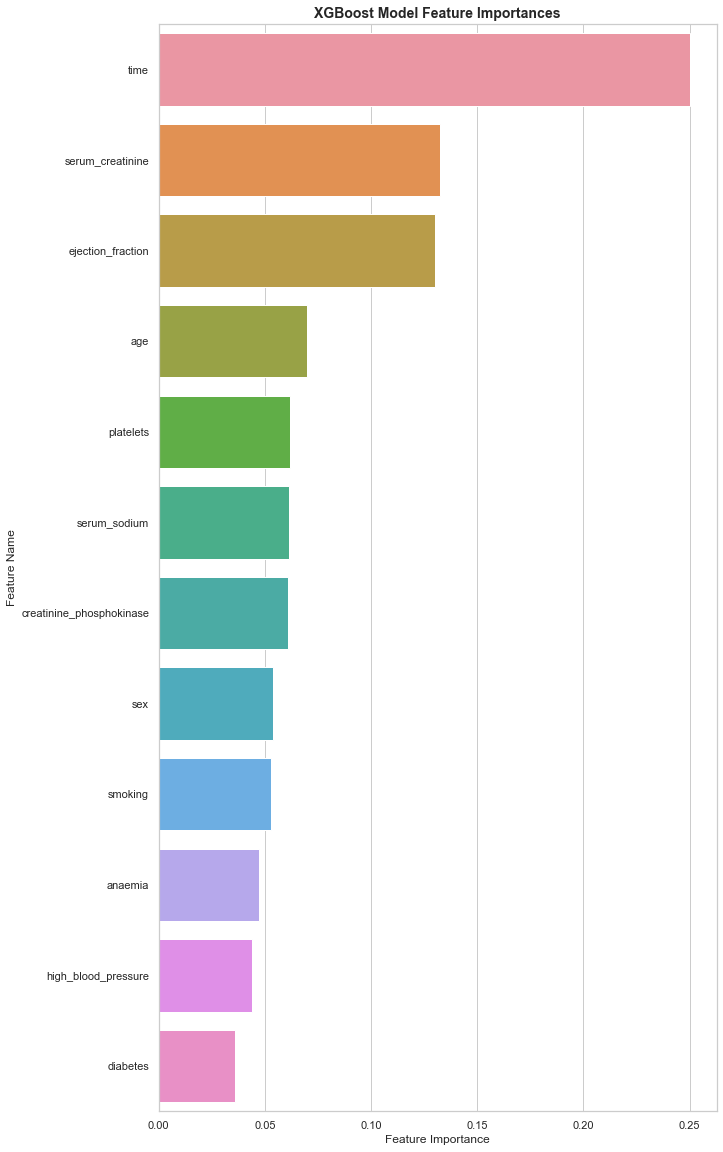

In [660]:
#Plot importances of all features sorted in descending order (most to least)
fig, ax = plt.subplots(figsize=(10,20))

sns.barplot(x=xgb_imp.f_value, y=xgb_imp.f_feature, ax =ax);
ax.set_xlabel('Feature Importance');
ax.set_ylabel('Feature Name');
ax.set_title('XGBoost Model Feature Importances', fontsize=14, fontweight='bold');

Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model (Threshold: 0.08)')

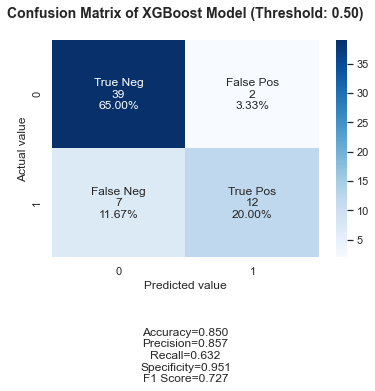

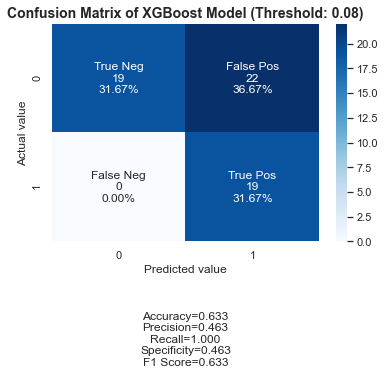

In [698]:
#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of XGBoost Model (Threshold: 0.50)\n", fontsize=14, fontweight='bold')

#probability threshold
threshold = 0.08

#make new predicitions based on this threshold
y_pred_threshold = (best_model_xgb.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of XGBoost Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

Like both of the previous models, the most significant predictors for the XGB model are **serum creatinine**, **ejection fraction**, and **time**.

With a validation set AUC of 0.89 the XGB model beats logistic regression AUC and is slightly lower than the Random Forest AUC. Looking at the first of the above confusion matrices, the model also predicts 11.67% of patients as false negatives in the test set which is the same as the Logistic Regression and Random Forest models at 0.50 threshold.  As previously stated, this is costly, considering that the event the model is trying to predict is death.  Lowering the threshold to 0.08 compensates for this issue.  At this threshold where the recall is 100%, there are more false positives (36.67%) than for the Logistic Regression model threshold where recall was 100% (35% false positives), and less false positives than for the Random Forest model threshold where recall was 100% (50% false positives).

### 5.4 Summary of Classification Models

In [663]:
#Create table to compare evaluation metrics from all 3 classification models
auc_loss_table = pd.DataFrame(
    {'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],  
     'AUC (Training)': [lr_train_auc, rf_train_auc, xgb_train_auc],
     'Mean AUC (5-Fold CV)': [lr_train_cv_auc.mean(), rf_train_cv_auc.mean(), xgb_train_cv_auc.mean()],
     'AUC (Validation)': [lr_val_auc, rf_val_auc, xgb_val_auc],
     'Log Loss (Training)': [lr_train_logloss, rf_train_logloss, xgb_train_logloss],
     'Mean Log Loss (5-Fold CV)': [abs(lr_train_cv_logloss.mean()), 
                                            abs(rf_train_cv_logloss.mean()), 
                                            abs(xgb_train_cv_logloss.mean())],
     'Log Loss (Validation)': [lr_val_logloss, rf_val_logloss, xgb_val_logloss]})

auc_loss_table.set_index('Model', inplace=True)
auc_loss_table

,AUC (Training),Mean AUC (5-Fold CV),AUC (Validation),Log Loss (Training),Mean Log Loss (5-Fold CV),Log Loss (Validation)
Model,,,,,,
Logistic Regression,0.877024,0.872918,0.856226,0.402284,0.428086,0.444526
Random Forest,0.953583,0.912724,0.906290,0.393333,0.430101,0.448995
XGBoost,0.979718,0.924837,0.892169,0.223707,0.344000,0.398419


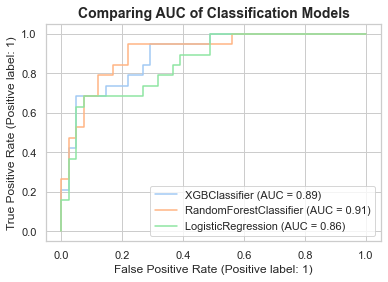

In [664]:
#Plot AUC for all 3 classification models
classifiers = [best_model_xgb, best_model_rf, lr_clf]
ax = plt.gca()
plt.title("Comparing AUC of Classification Models", fontsize=14, fontweight='bold')

for i in classifiers:
    plot_roc_curve(i, X_val, y_val, ax=ax) #XGBoost and Random Forest need to use label encoded data

Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model (Threshold: 0.08)')

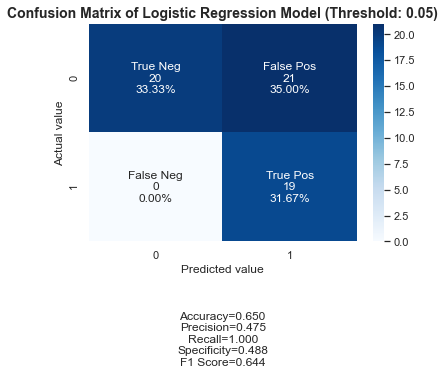

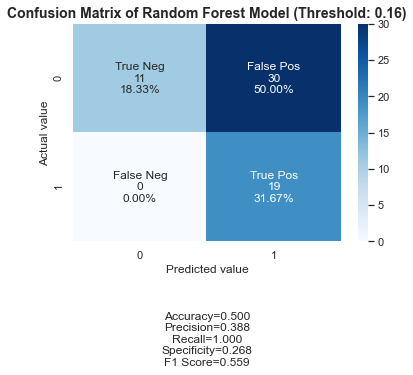

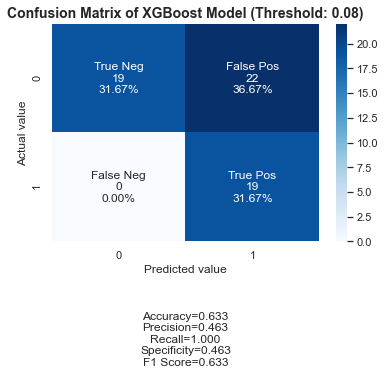

In [700]:
#probability threshold
threshold = 0.05

#make new predicitions based on this threshold
y_pred_threshold = (lr_clf.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

#probability threshold
threshold = 0.16

#make new predicitions based on this threshold
y_pred_threshold = (best_model_rf.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of Random Forest Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

#probability threshold
threshold = 0.08

#make new predicitions based on this threshold
y_pred_threshold = (best_model_xgb.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of XGBoost Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

Overall, the Random Forest had the best AUC.  However, if the goal of the predictive model is to have 100% recall (i.e. pick up on all of the potential high risk CVD patients), then the Logistic Regression model performed the best.  That is, at the threshold where 100% recall occurs, there was less sacrifice of accuracy, specificity, precision, and F1 score (see comparison of the 3 confusion matrices above).    

As stated earlier, none of the classification models take into consideration that the data is censored.  **Survival analysis** does account for censoring and is explored in the next sub-section.   

### 5.5 Survival Analysis

A **Cox proportional hazards** (CPH) model is fit below and then a few survival curves are generated.  The **Kaplan-Meier** method survival curves shown previously and the log rank tests provide a statistical comparison of two groups across a single predictor.  The **Cox proportional hazards** model allows *all* predictors to be accounted for in its predictions.

In [701]:
from lifelines import CoxPHFitter, KaplanMeierFitter

cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary(decimals=3)

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.228
         time fit was run = 2021-09-01 13:30:19 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                       0.046      1.048      0.009            0.028            0.065                1.029                1.067
anaemia                   0.460      1.584      0.217            0.035            0.885                1.036                2.423
creatinine_phosphokinase  0.000      1.000      0.000            0.000            0.000                1.000                1.000
diabetes                  0.140      1.150      0.223           -0.297            0.577                0.743                1.781
ejection_fraction        -0.049      0.952      0.010           -0.069           -0.028                0.933                0.972
high_blood_pressure       0.476      1.609      0.216            0.052            0.899                1.053                2.458
platelets                -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
serum_creatinine          0.321      1.379      0.070            0.184            0.459                1.201                1.582
serum_sodium             -0.044      0.957      0.023           -0.090            0.001                0.914                1.001
sex                      -0.238      0.789      0.252           -0.731            0.256                0.482                1.291
smoking                   0.129      1.138      0.251           -0.363            0.621                0.695                1.861

                              z       p   -log2(p)
covariate                                         
age                       4.977 <0.0005     20.564
anaemia                   2.122   0.034      4.885
creatinine_phosphokinase  2.226   0.026      5.263
diabetes                  0.627   0.531      0.914
ejection_fraction        -4.672 <0.0005     18.354
high_blood_pressure       2.201   0.028      5.170
platelets                -0.412   0.681      0.555
serum_creatinine          4.575 <0.0005     17.681
serum_sodium             -1.899   0.058      4.120
sex                      -0.944   0.345      1.535
smoking                   0.513   0.608      0.718
---
Concordance = 0.741
Partial AIC = 958.456
log-likelihood ratio test = 81.955 on 11 df
-log2(p) of ll-ratio test = 40.559

By looking at the p-values the most significant predictors are **serum_creatinine** and **ejection_fraction**  A plot of the predictors with their corresponding **log(hazard ratio)** is below.  Essentially, a log(hazard ratio) of 0 is the same as a hazard ratio of 1 (i.e. no difference in the rate of death).  If the 95% confidence interval for the log(hazard ratio) crosses 0 (i.e. the 95% confidence interval for the hazard ratio crosses 1), then the predictor is not statistically significant at the p<0.05 level.  This is also seen in the summary of the model above.  

<AxesSubplot:xlabel='log(HR) (95% CI)'>

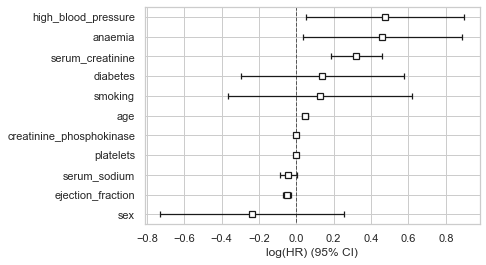

In [667]:
cph.plot()

Next, survival curves are generated for various ejection fractions and serum creatinine levels, since these were the 2 most significant predictors.

From the plots below, it's clearly seen that as the ejection fraction drops, there is a huge drop in survival probabilities.  It's also clearly seen that as serum creatinine increases, there is a huge drop in survival probabilities. Again, as opposed to the KM curves used for EDA, these curves account for all of the other predictors.

In the curves below, the **baseline** curves represents the median value in the dataset for that particular predictor.   

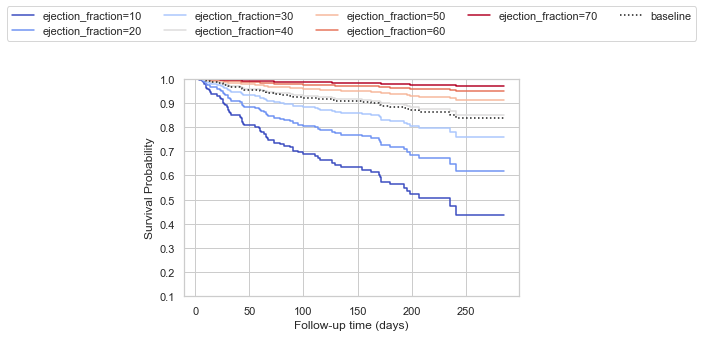

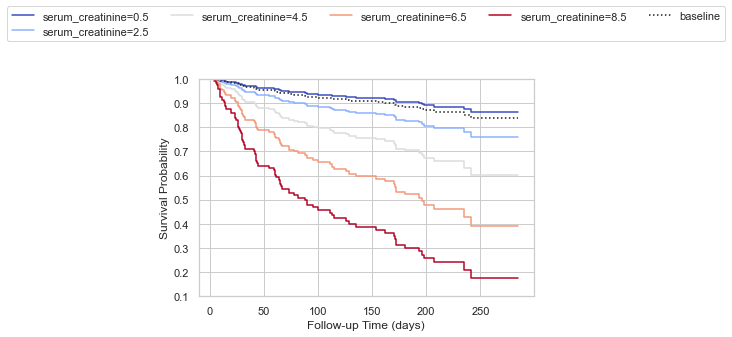

In [717]:
cph.plot_partial_effects_on_outcome(covariates='ejection_fraction', values=np.arange(10, 80, 10), cmap='coolwarm')
plt.xlabel("Follow-up time (days)")
plt.ylabel("Survival Probability")
plt.ylim([0.1, 1])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=5)

cph.plot_partial_effects_on_outcome(covariates='serum_creatinine', values=np.arange(0.5, 10, 2), cmap='coolwarm')
plt.xlabel("Follow-up Time (days)")
plt.ylabel("Survival Probability")
plt.ylim([0.1, 1])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=5)

For comparison, platelets, a predictor that does not have a statistically significant effect, is used to plot survival curves below.  As seen, there is not much difference in the curves at varying levels of platelets compared to serum creatinine and ejection fraction.  Keep in mind that the y-scale has a smaller range as well, so the space between the different survival curves for platelets would be closer together if the range was similar to the above plots.  It     

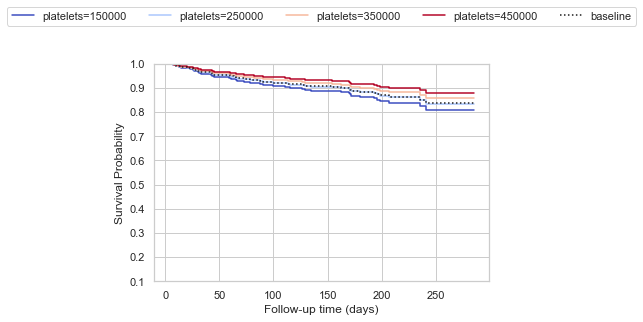

In [718]:
cph.plot_partial_effects_on_outcome(covariates='platelets', values=np.arange(150000, 450001, 100000), cmap='coolwarm')
plt.xlabel("Follow-up time (days)")
plt.ylabel("Survival Probability")
plt.ylim([0.1, 1])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=5)

Here is an example of how the CPH  model is used for prediction.  Let's say a two hypothetical patient came in with the following characteristics and values.

<b><u> PATIENT 1</u></b>
<ul>
<li><b>anaemia</b>: No </li> 
<li><b>diabetes</b>: Yes </li>
<li><b>high_blood_pressure</b>: Yes</li>
<li><b>smoking</b>: No </li>
<li><b>sex</b>: Female </li> 
<li><b>age</b>: 55 </li> 
<li><b>creatinine_phosphokinase</b>: 200 mcg/L </li> 
<li><b>ejection_fraction</b>: 50% </li> 
<li><b>platelets</b>: 150,000k/mL </li> 
<li><b>serum_creatinine</b>: 2 mg/dL</li> 
<li><b>serum_sodium</b>: 135 mEq/L</li> 
</ul>
<br>
<b><u> PATIENT 2</u></b>
<ul>
<li><b>anaemia</b>: Yes </li> 
<li><b>diabetes</b>: Yes </li>
<li><b>high_blood_pressure</b>: Yes</li>
<li><b>smoking</b>: Yes </li>
<li><b>sex</b>: Male </li> 
<li><b>age</b>: 70 </li> 
<li><b>creatinine_phosphokinase</b>: 190 mcg/L </li> 
<li><b>ejection_fraction</b>: 30% </li> 
<li><b>platelets</b>: 100,000k/mL </li> 
<li><b>serum_creatinine</b>: 3 mg/dL</li> 
<li><b>serum_sodium</b>: 138 mEq/L</li> 
</ul>

Survival curves can be plotted for each of these patients to compare their survival probabilities over time.  In the curves below, the **baseline** curve represents the survival curve where the values of the predictors are equal to the median values of all of the predictors.     

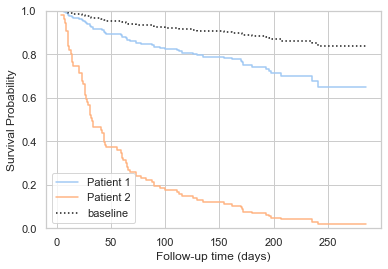

In [720]:
cph.plot_partial_effects_on_outcome(covariates=["anaemia",
                                                "diabetes",
                                                "high_blood_pressure", 
                                                "smoking", 
                                                "sex", 
                                                "age", 
                                                "creatinine_phosphokinase",
                                                "ejection_fraction",
                                                "platelets",
                                                "serum_creatinine",
                                                "serum_sodium"], 
                                                values=[[0, 1, 1, 0, 0, 55, 200, 50, 150000, 2, 135], 
                                                        [1, 1, 1, 1, 1, 70, 190, 30, 100000, 3, 138]])
plt.xlabel("Follow-up time (days)")
plt.ylabel("Survival Probability")
plt.ylim([0, 1])
L=plt.legend()
L.get_texts()[0].set_text('Patient 1')
L.get_texts()[1].set_text('Patient 2')
#plt.legend(loc="right")

Patient 2 has a much worse prognosis, likely due to lower ejection fraction and higher serum creatinine.  

The survival curves can also be formatted into a table to see exact values.  For example, after 100 days, Patient 1 has a 85.9% estimated probability of survival compared to 24.1% for Patient 2 as seen in the table below.

In [671]:
columns=['anaemia','diabetes','high_blood_pressure','smoking','sex','age',
         'creatinine_phosphokinase','ejection_fraction','platelets',
         'serum_creatinine','serum_sodium']

values=[[0, 1, 1, 0, 0, 55, 200, 50, 150000, 2, 135], 
        [1, 1, 1, 1, 1, 70, 190, 30, 100000, 3, 138]]
       
df_newdata = pd.DataFrame(np.array(values), columns=columns)
                                         
df_pred = cph.predict_survival_function(df_newdata)
df_pred.index.names = ['Time (days)']
df_pred.rename(columns={0: "Patient 1-Survival Probability", 1: "Patient 2-Survival Probability"}, inplace=True)
df_pred

,Patient 1-Survival Probability,Patient 2-Survival Probability
Time (days),,
4.0,0.998655,0.987485
6.0,0.997294,0.974970
7.0,0.994568,0.950319
8.0,0.991829,0.926115
10.0,0.983314,0.854345
11.0,0.979986,0.827675
12.0,0.979986,0.827675
13.0,0.978317,0.814579
14.0,0.974975,0.788919


## <a id='conclusions'> 6. Conclusions</a>

Whether using classification or survival analysis, **ejection fraction** and **serum creatinine** were the great predictors of death.  Survival analysis gives more information with respect to a time frame when a death event is more likely to occur compared to traditional classification.  Of the classification models, the Random Forest had the best AUC, but logistic regression performed the best if lowering the probability threshold to a level where recall was 100%.  

If **time** was added as a predictor to the classification models, however, as previously stated, in this dataset the longer follow-up times tend to bias towards survival, so it may cause target leakage and/or bias.  Additionally, traditional classification does not account for censoring.  If the data was not censored, and the purpose was to classify patients survival risks at a specific time point of interest, then a binary classifier would be more powerful than a survival prediction model as the exact time until death would be known.  However, this is not that realistic for this type of data.  

Feel free to <a href='mailto:anilkumar9782@gmail.com'> email me</a> with any questions or comments!

<center>
    <a href='#top'> <b><h2> GO BACK TO TOP</h2></b></a>
</center>